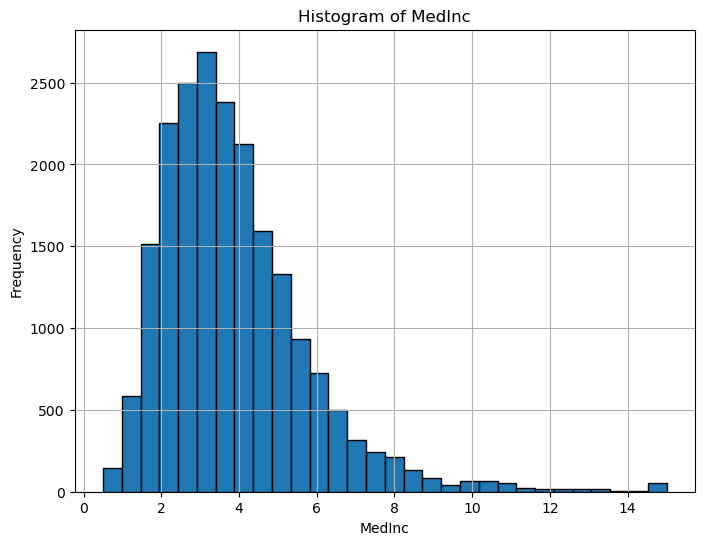

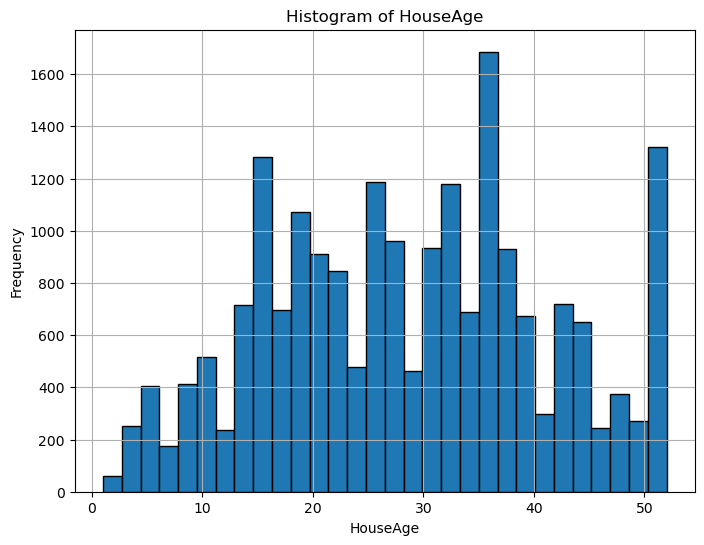

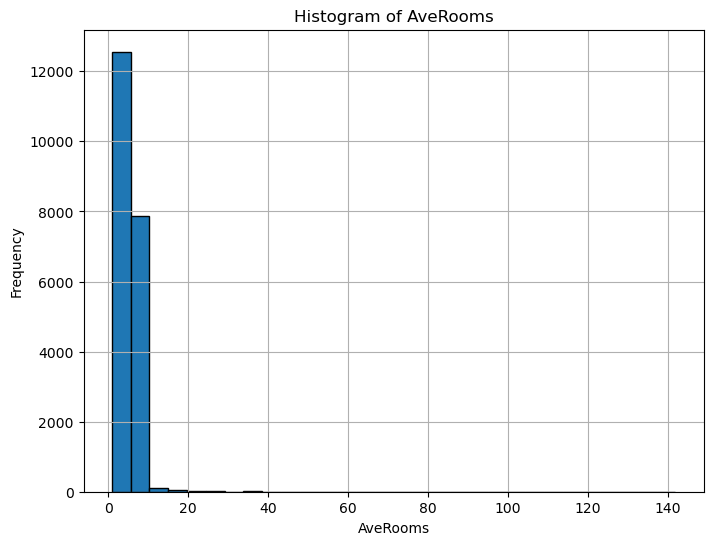

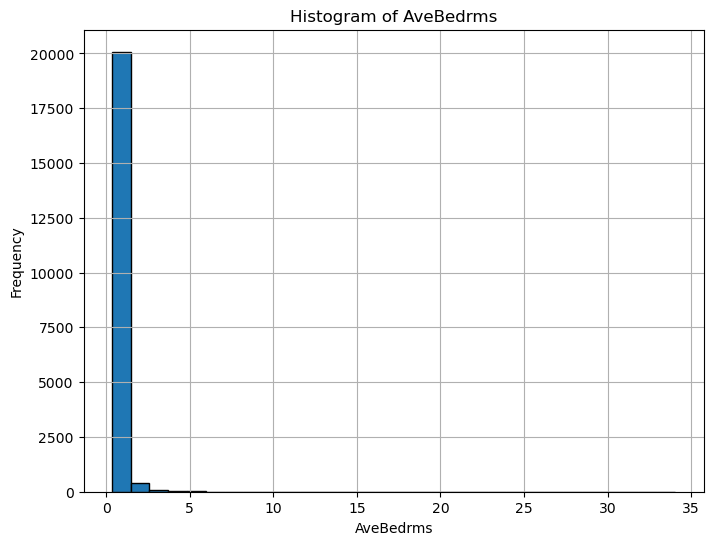

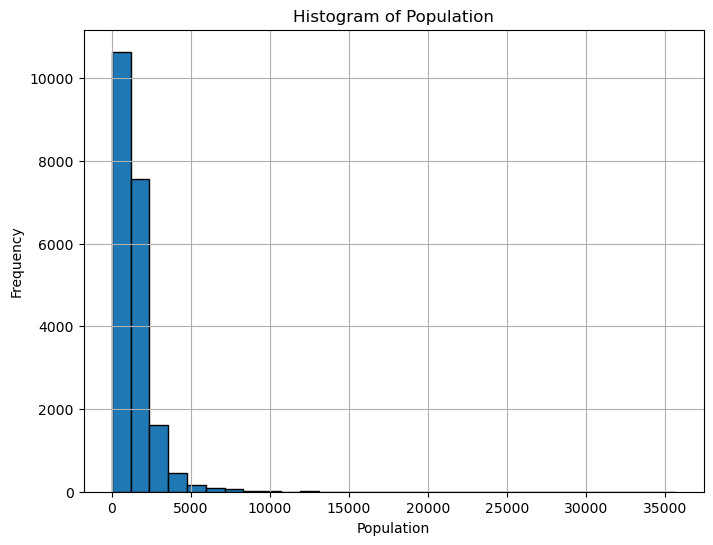

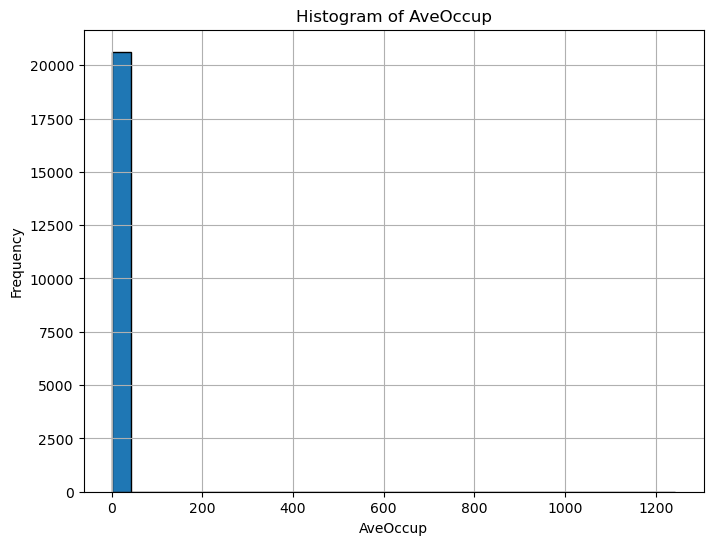

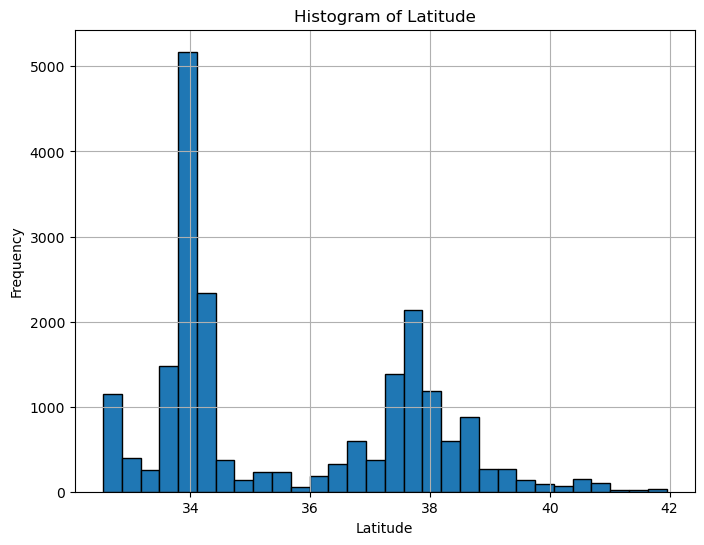

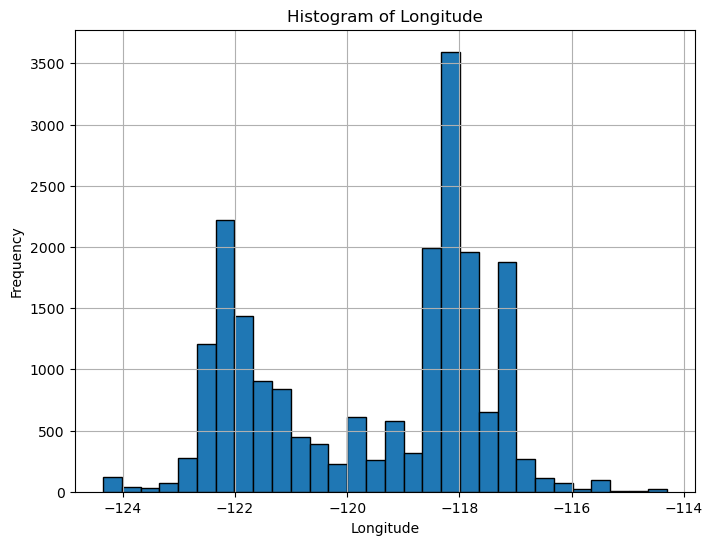

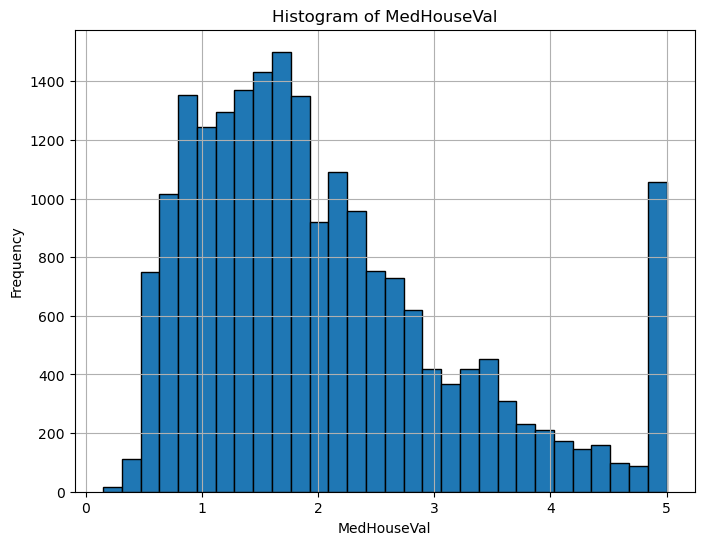

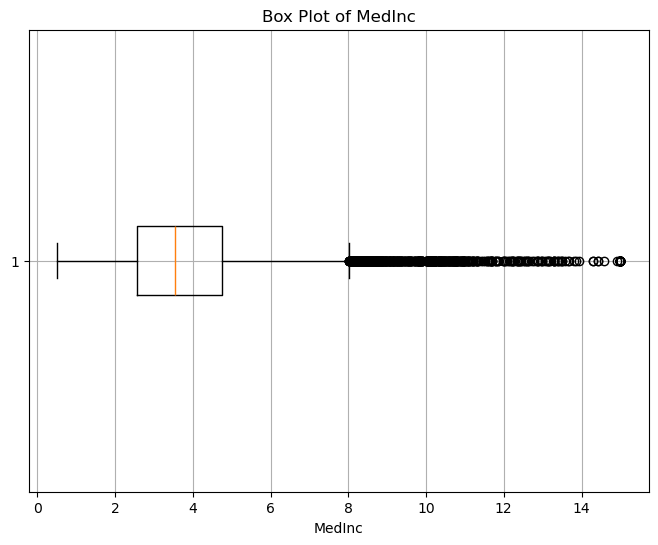

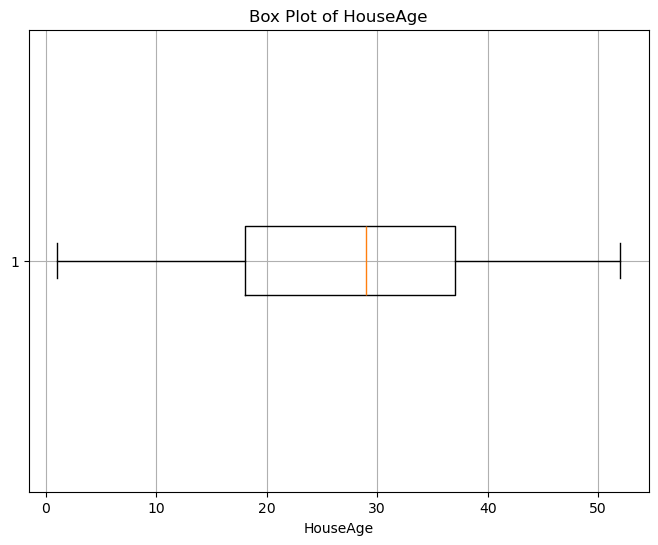

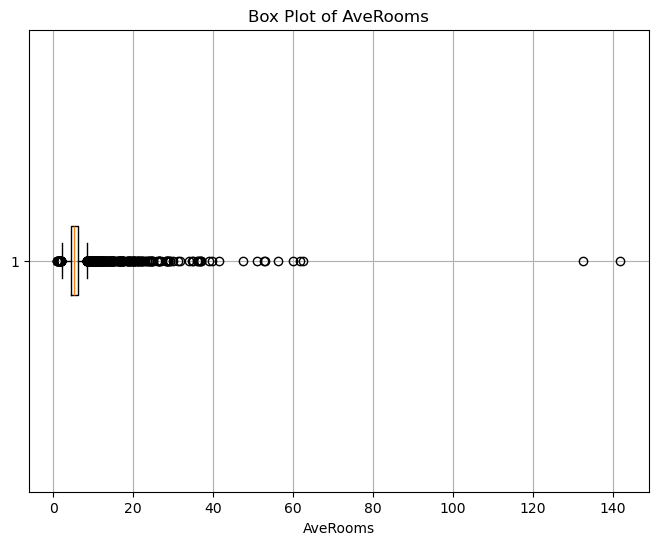

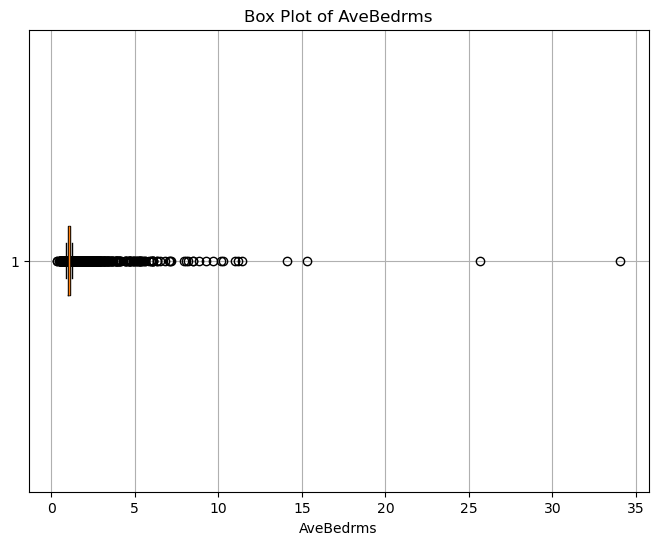

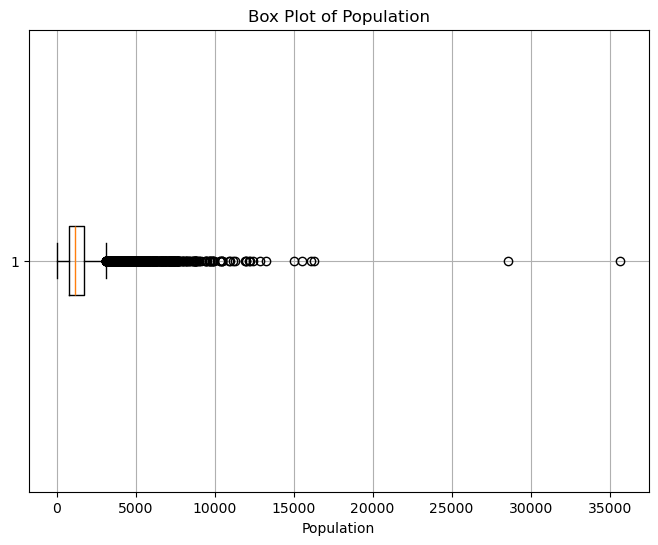

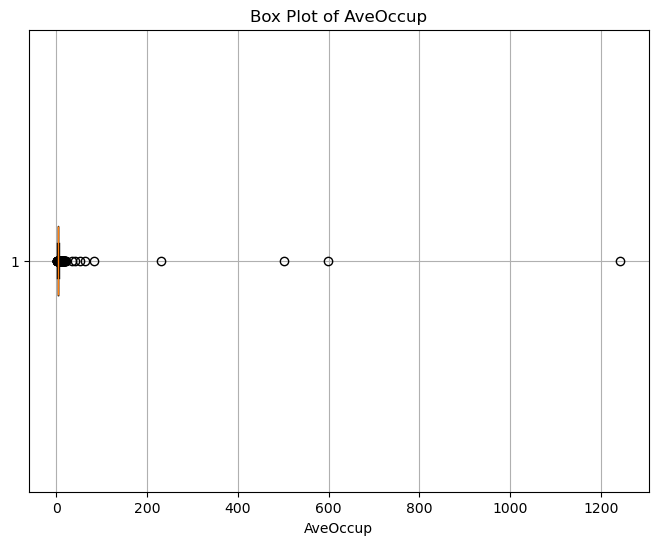

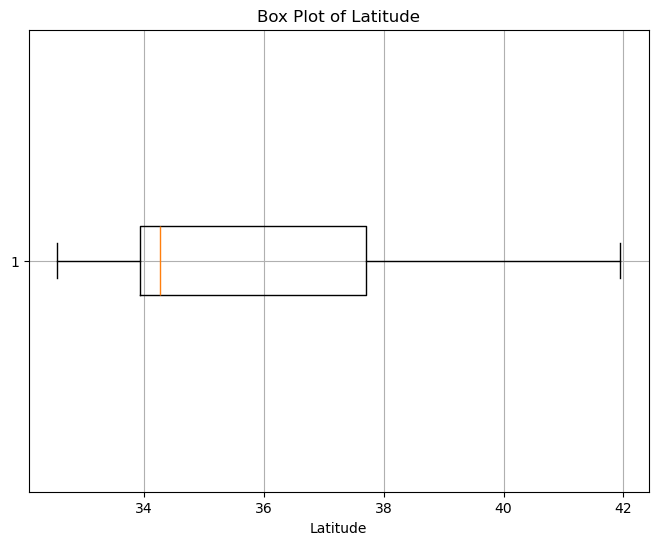

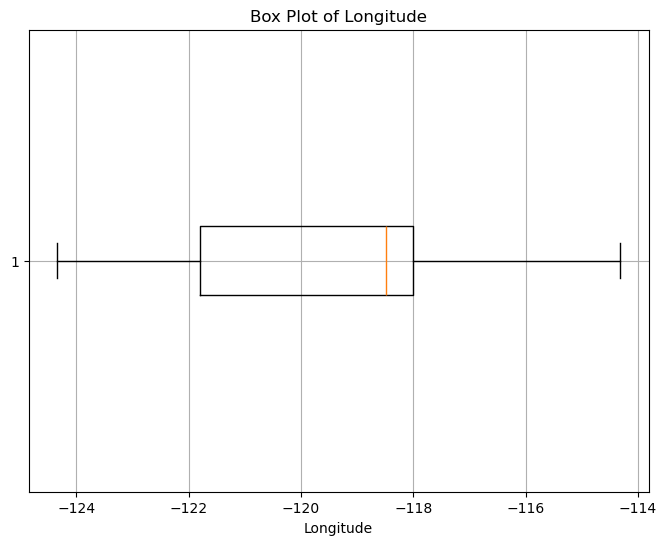

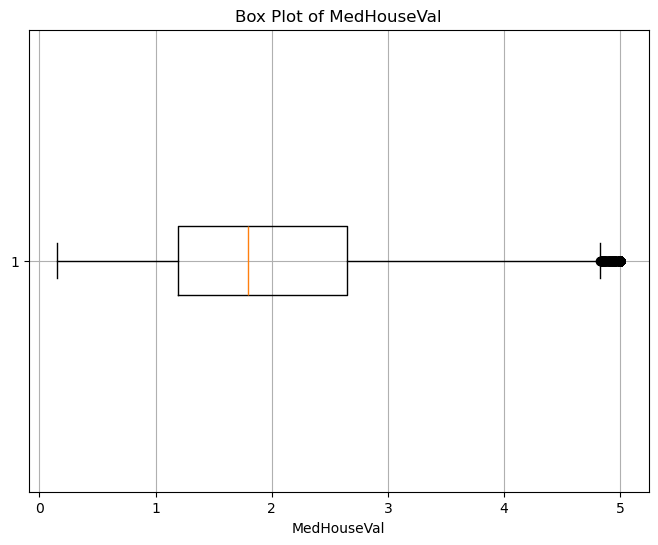

Outlier Summary:

MedInc:
Number of outliers: 681
Sample outlier values: [8.3252, 8.3014, 11.6017, 8.2049, 8.401, 8.317, 8.1564, 8.8793, 8.8342, 10.0825]

HouseAge:
Number of outliers: 0
Sample outlier values: []

AveRooms:
Number of outliers: 511
Sample outlier values: [1.7142857142857142, 8.972868217054264, 8.928358208955224, 9.210227272727273, 9.122715404699738, 9.0, 8.518248175182482, 8.973684210526315, 10.51530612244898, 29.852941176470587]

AveBedrms:
Number of outliers: 1424
Sample outlier values: [1.248995983935743, 1.3729508196721312, 0.7543859649122807, 1.2608695652173914, 1.5573770491803278, 1.490566037735849, 1.368421052631579, 1.6598639455782314, 1.329268292682927, 1.3421052631578947]

Population:
Number of outliers: 1196
Sample outlier values: [3469.0, 4367.0, 4985.0, 3337.0, 3276.0, 3668.0, 3741.0, 7427.0, 5781.0, 3827.0]

AveOccup:
Number of outliers: 711
Sample outlier values: [4.658823529411765, 10.272727272727273, 5.617647058823529, 4.666666666666667, 12.234042553191

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Ensure plots display inline in Jupyter
%matplotlib inline

# Step 1: Load California Housing dataset directly into DataFrame
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Step 2: Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Generate histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()  # <- CHANGED

# Step 4: Generate box plots and identify outliers
outlier_summary = {}
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()  # <- CHANGED

    # Identify outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'num_outliers': len(outliers),
        'outlier_values': outliers.tolist()[:10]
    }

# Step 5: Print outlier summary
print("Outlier Summary:")
for col, info in outlier_summary.items():
    print(f"\n{col}:")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Sample outlier values: {info['outlier_values']}")
